In [1]:
import pyart, tempfile, os, shutil
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image, display
from tint import Cell_tracks, animate
from tint.data_utils import get_nexrad_keys, read_nexrad_key
from tint.visualization import embed_mp4_as_gif

In [5]:
keys=get_nexrad_keys('klot', start='20180604_050000', end= '20180604_184300')

Found 64 keys.


TypeError: publish() got an unexpected keyword argument 'format'

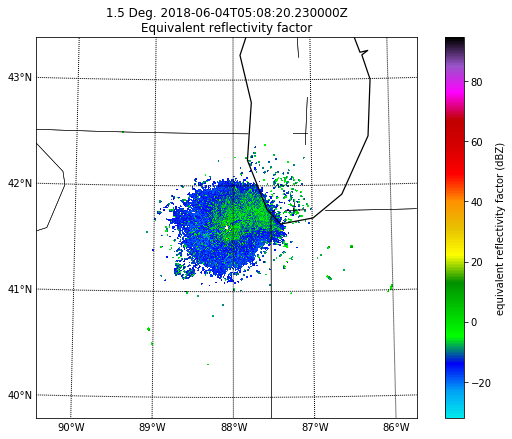

In [6]:
%matplotlib inline
# We can visualize this data using pyart and matplotlib
fig = plt.figure(figsize=(10, 7))


def plot_ppi(key):
    """ Plots ppi map of nexrad data given S3 key. """
    plt.clf()
    radar = read_nexrad_key(key)
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('reflectivity', resolution='l',
                         sweep=3, fig=fig, width=400000, height=400000)
    del display, radar


ppi_anim = FuncAnimation(fig, plot_ppi, frames=keys, interval=1000)
tmp_anim = tempfile.NamedTemporaryFile()
ppi_anim.save(tmp_anim.name + '.mp4', writer='ffmpeg')
embed_mp4_as_gif(tmp_anim.name + '.mp4')
os.remove(tmp_anim.name + '.mp4')

